## Guided Example - Supervised Learning: Random Forest Model - Reference Solution
Link to Checkpoint:https://courses.thinkful.com/dsbc-random-forest-v1/checkpoint/6

In [4]:
#load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [2]:
#load the data
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)
#preprocess the data
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#run initial Rf model
rfc = ensemble.RandomForestClassifier(random_state=0)
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10,n_jobs= -1)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

array([0.97929282, 0.98043267, 0.98188122, 0.98173874, 0.95131798,
       0.97767751, 0.92711772, 0.98057422, 0.98007457, 0.9800741 ])

### Create a list of the top 30 features from the random forest model.

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


30


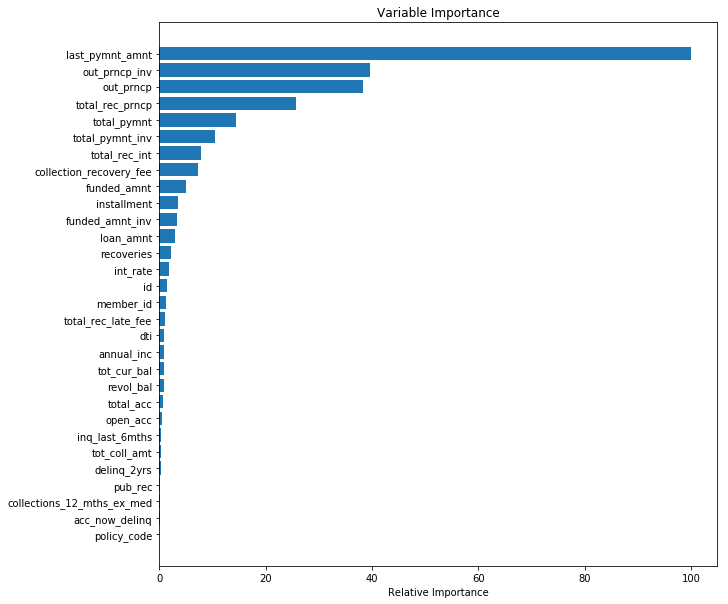

In [8]:
#fit the RF model
X.fit = rfc.fit(X,Y)

#collect importances
feature_importance = rfc.feature_importances_
# make importances relative to max importance and select top 30
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]
pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)

sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
rf_fi = pd.DataFrame(feature_importance[sorted_idx], X.columns[sorted_idx]).reset_index()
rf_fi.columns = ['variable','value']
rf_fi =rf_fi.sort_values(by='value',ascending = 'True')
#rf_fi.to_csv('RF_feature_imp.csv')

### Subset the data and re-run the model cross validation with the top 30 features

Step 1. Top 30 features with the default number of estimators.

In [14]:
rfc = ensemble.RandomForestClassifier(random_state=0)
X30 = y2015.drop('loan_status', 1)[rf_fi['variable']]
cv_score = cross_val_score(rfc, X30, Y, cv=10,n_jobs= -1)

In [16]:
print(cv_score)

[0.85704448 0.97157512 0.96903422 0.96597089 0.9684398  0.96737117
 0.96435441 0.96473438 0.96342651 0.95993445]


In [17]:
import numpy as np
# Question 1.
#get mean score
mn_cv_score = np.mean(cv_score)
mn_cv_score

0.9551885430572733

In [ ]:
var_cv_score = np.var(cv_score)
var_cv_score

Step 2. Top 30 features with 200 estimators

In [ ]:
#increase the number of estimators
rfc = ensemble.RandomForestClassifier(random_state=0, n_estimators = 200, n_jobs=-1)
X30 = y2015.drop('loan_status', 1)[rf_fi['variable']]
cv_score = cross_val_score(rfc, X30, Y, cv=10,n_jobs= -1)
print(cv_score)

In [ ]:
mn_cv_score = np.mean(cv_score)
print(mn_cv_score)
var_cv_score = np.var(cv_score)
print(var_cv_score)

### Implement the PCA
Plot the cummulative sum of explained variance for the full range of PC's for the full dataframe.

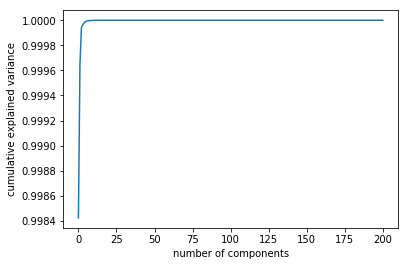

In [18]:
from sklearn.decomposition import PCA

#plot to choose the number of components
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.savefig('pca.png')

Step 4. PCA with 3 components

In [29]:
pca3 = PCA(3).fit(X)

In [30]:
pca_result = pca3.fit_transform(X)

Step 5. RF model built with the Principal Components?

In [31]:
cv_score = cross_val_score(rfc, pca_result, Y, cv=10,n_jobs= -1)

In [32]:
print(cv_score)

[0.68233953 0.21972881 0.16021942 0.14376291 0.1115412  0.09665163
 0.07803557 0.08014914 0.13187831 0.2431245 ]


In [33]:
mn_cv_score = np.mean(cv_score)
mn_cv_score

0.19474310203501982

In [34]:
var_cv_score = np.var(cv_score)
var_cv_score

0.02917550867879364